# Cargar los datos
<hr>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../Descriptores_moleculares/Dataframes_descriptores/des_SRC.csv")

# Visualizar datos
<hr>

In [3]:
df.head()

,Molecule ChEMBL ID,Molecule Name,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL101917,NaN,COc1cc2ncc(C#N)c(Nc3ccc(Cl)cc3Cl)c2cc1OC,IC50,'=',5200.00,nM,9.456555,9.456555,0.380312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL295902,NaN,COC(=O)C(=O)C(=O)c1ccc(CC(NC(C)=O)C(=O)N[C@@H]...,IC50,'=',8600.00,nM,13.308309,13.308309,0.045593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL2111833,NaN,CC(=O)N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)N[C@H...,IC50,'=',100.00,nM,13.521368,13.521368,0.018500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHEMBL77303,NaN,Oc1ccc2c(ncn2-c2ccccc2)c1O,IC50,'=',460.00,nM,9.692648,9.692648,0.156656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL128705,NaN,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCOCC4)c(OC)cc23)...,IC50,'=',0.95,nM,9.746687,9.746687,0.388472,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Añadir el valor de 1000
<hr>

In [4]:
# 1 significa inhibidor
# 0 significa no inhibidor

def inhibidor(IC50):
    if IC50 > 1000:
        return 0
    else:
        return 1

In [5]:
df["Inhibidor"] = df["Standard Value"].apply(inhibidor)

In [6]:
df.to_csv("Datos_con_1000/SRC_1000.csv", index=False)

# Escalado de datos
<hr>

In [6]:
col_names = df.columns[7:217]

In [7]:
descriptors = df[col_names]

In [8]:
descriptors.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,9.456555,9.456555,0.380312,0.380312,0.682131,10.360000,374.227,361.123,373.038482,126.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.308309,13.308309,0.045593,-1.625766,0.036251,13.936170,663.681,622.353,663.275172,258.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13.521368,13.521368,0.018500,-4.697674,0.190481,18.214286,601.637,561.317,601.255302,228.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.692648,9.692648,0.156656,-0.183166,0.626393,10.823529,226.235,216.155,226.074228,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.746687,9.746687,0.388472,0.388472,0.348288,13.914286,561.864,535.656,560.082595,184.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
scaled_data = scaler.fit_transform(descriptors)

In [11]:
df_scaled = pd.DataFrame(scaled_data, columns=descriptors.columns)

In [12]:
df_scaled

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.516546,0.516546,0.392974,0.917956,0.759277,0.029763,0.086732,0.090917,0.086327,0.071274,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.797206,0.797206,0.047111,0.637793,0.026762,0.172707,0.207976,0.207894,0.207967,0.213823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.812730,0.812730,0.019116,0.208780,0.201680,0.343709,0.181987,0.180563,0.181974,0.181425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.533749,0.533749,0.161872,0.839263,0.696063,0.048291,0.024743,0.026000,0.024734,0.025918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.537687,0.537687,0.401406,0.919096,0.380654,0.171833,0.165328,0.169072,0.164719,0.133909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,0.674413,0.674413,0.537577,0.397138,0.412735,0.209520,0.143048,0.144350,0.142962,0.131749,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.0
2920,0.684547,0.684547,0.037461,0.324157,0.415340,0.519717,0.132524,0.134454,0.132479,0.127430,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
2921,0.778701,0.778701,0.101009,0.230822,0.407380,0.202931,0.153471,0.156397,0.153458,0.151188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2922,0.777609,0.777609,0.067680,0.855696,0.657703,0.052384,0.079277,0.079787,0.079255,0.079914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


# Filtro de baja varianza
<hr>

In [13]:
df_scaled.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.516546,0.516546,0.392974,0.917956,0.759277,0.029763,0.086732,0.090917,0.086327,0.071274,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.797206,0.797206,0.047111,0.637793,0.026762,0.172707,0.207976,0.207894,0.207967,0.213823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.812730,0.812730,0.019116,0.208780,0.201680,0.343709,0.181987,0.180563,0.181974,0.181425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.533749,0.533749,0.161872,0.839263,0.696063,0.048291,0.024743,0.026000,0.024734,0.025918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.537687,0.537687,0.401406,0.919096,0.380654,0.171833,0.165328,0.169072,0.164719,0.133909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0


In [14]:
threshold = 0.01

In [15]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=threshold)

In [16]:
selector.fit(df_scaled)

VarianceThreshold(threshold=0.01)

In [17]:
des_var= df_scaled.loc[:, selector.get_support()]

In [18]:
des_var

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,...,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_ester,fr_piperzine,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_thiazole,fr_thiophene,fr_urea
0,0.516546,0.516546,0.392974,0.917956,0.759277,0.029763,0.160785,0.355505,0.644495,0.190138,...,0.000000,0.000000,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0
1,0.797206,0.797206,0.047111,0.637793,0.026762,0.172707,0.596972,0.388312,0.611688,0.705957,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.812730,0.812730,0.019116,0.208780,0.201680,0.343709,0.877983,0.356595,0.733345,0.963651,...,0.000000,0.000000,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.533749,0.533749,0.161872,0.839263,0.696063,0.048291,0.206511,0.323419,0.676581,0.244212,...,0.285714,0.285714,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.537687,0.537687,0.401406,0.919096,0.380654,0.171833,0.161633,0.349081,0.650919,0.191142,...,0.000000,0.000000,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,0.674413,0.674413,0.537577,0.397138,0.412735,0.209520,0.293384,0.705442,0.294558,0.346945,...,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.5,0.0,0.5,0.0
2920,0.684547,0.684547,0.037461,0.324157,0.415340,0.519717,0.411785,0.665894,0.334106,0.486962,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2921,0.778701,0.778701,0.101009,0.230822,0.407380,0.202931,0.663226,0.665949,0.427240,0.706991,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2922,0.777609,0.777609,0.067680,0.855696,0.657703,0.052384,0.352883,0.832105,0.167895,0.417306,...,0.000000,0.000000,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0


In [19]:
des_var.to_csv("Baja_varianza/SRC_var.csv", index=False)

# Determinación de correlación
<hr>

In [20]:
correlation_spearman = des_var.corr(method='spearman')

In [21]:
correlation_spearman

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,...,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_ester,fr_piperzine,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_thiazole,fr_thiophene,fr_urea
MaxAbsEStateIndex,1.000000,1.000000,-0.441638,-0.723700,-0.555803,0.179455,0.638439,0.083101,0.078125,0.639152,...,0.096990,0.097742,0.242034,0.020390,-0.132226,0.145951,0.070347,-0.039496,-0.071251,0.206517
MaxEStateIndex,1.000000,1.000000,-0.441638,-0.723700,-0.555803,0.179455,0.638439,0.083101,0.078125,0.639152,...,0.096990,0.097742,0.242034,0.020390,-0.132226,0.145951,0.070347,-0.039496,-0.071251,0.206517
MinAbsEStateIndex,-0.441638,-0.441638,1.000000,0.570329,0.157947,-0.190537,-0.419723,-0.017288,-0.171646,-0.410535,...,-0.199057,-0.198439,-0.304284,0.111968,0.283728,-0.101851,-0.014987,0.059688,0.126527,0.048489
MinEStateIndex,-0.723700,-0.723700,0.570329,1.000000,0.415891,-0.194368,-0.784619,-0.137682,-0.182900,-0.776640,...,-0.072289,-0.070655,-0.481487,0.088124,0.301301,-0.136661,-0.240209,0.073448,0.119501,-0.059436
qed,-0.555803,-0.555803,0.157947,0.415891,1.000000,-0.095108,-0.427093,0.069743,-0.217195,-0.430313,...,-0.000336,-0.001711,-0.289315,-0.092393,0.026638,-0.132317,-0.022920,-0.040366,-0.057580,-0.212214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_sulfide,0.145951,0.145951,-0.101851,-0.136661,-0.132317,0.124093,0.172629,-0.035338,0.159218,0.165380,...,-0.029970,-0.029758,0.280778,-0.037485,-0.035802,1.000000,-0.032729,-0.021618,-0.001145,0.016408
fr_sulfonamd,0.070347,0.070347,-0.014987,-0.240209,-0.022920,0.117479,0.003832,0.103416,-0.132897,0.003875,...,0.031247,0.031759,-0.074272,0.043483,-0.107690,-0.032729,1.000000,-0.034963,-0.019236,-0.031683
fr_thiazole,-0.039496,-0.039496,0.059688,0.073448,-0.040366,0.019931,-0.011432,0.026786,-0.027071,-0.009744,...,-0.048896,-0.048698,0.005989,0.068630,0.026180,-0.021618,-0.034963,1.000000,-0.016979,0.000471
fr_thiophene,-0.071251,-0.071251,0.126527,0.119501,-0.057580,0.000057,-0.104934,0.009695,-0.040346,-0.104265,...,-0.073051,-0.072823,-0.049772,0.078265,0.183310,-0.001145,-0.019236,-0.016979,1.000000,-0.017773


In [22]:
correlation_spearman_abs = correlation_spearman.abs()

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


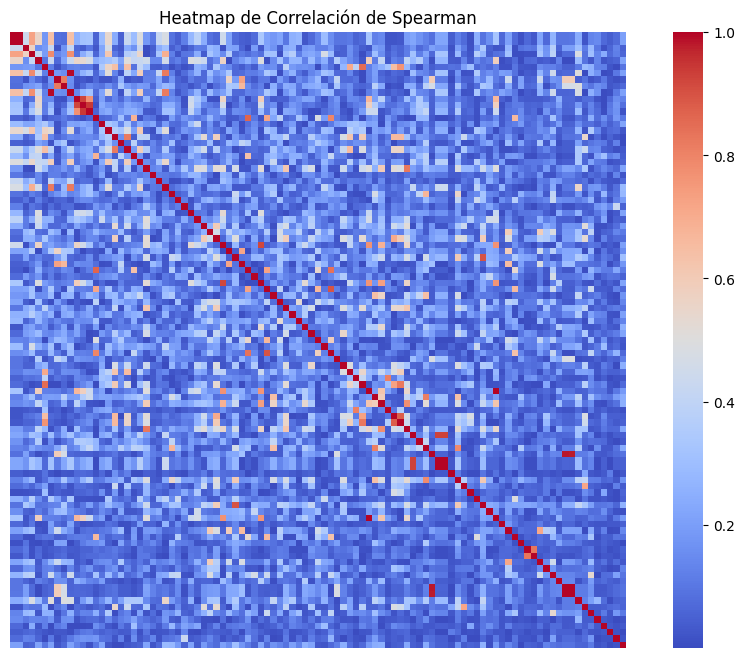

In [24]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el heatmap
sns.heatmap(correlation_spearman_abs, cmap='coolwarm', fmt='.2f', square=True, xticklabels=False, yticklabels=False)

# Configurar los títulos y etiquetas
plt.title('Heatmap de Correlación de Spearman')
plt.show()


In [25]:
import random

to_keep = []

for col in correlation_spearman.columns:
    for idx in range(len(correlation_spearman)):
        # Usa .iloc para acceder a los elementos por posición
        if abs(correlation_spearman.iloc[idx][col]) > 0.85 and col != correlation_spearman.index[idx]:
            # Solo agregar si la variable no está ya en la lista para evitar duplicados
            if col not in to_keep and correlation_spearman.index[idx] not in to_keep:
                # Elegir aleatoriamente una variable del par
                selected_variable = random.choice([col, correlation_spearman.index[idx]])
                if selected_variable not in to_keep:
                    to_keep.append(selected_variable)

# Ahora 'to_keep' contendrá las variables seleccionadas
print("Variables seleccionadas:", to_keep)


Variables seleccionadas: ['MaxEStateIndex', 'SPS', 'MaxPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'SlogP_VSA12', 'SlogP_VSA6', 'fr_aniline', 'SlogP_VSA7', 'NumAromaticCarbocycles', 'NumSaturatedHeterocycles', 'fr_COO', 'fr_COO2', 'fr_Ar_OH', 'fr_phenol']


In [26]:
df_corr = des_var.drop(columns=to_keep)

In [27]:
correlation_spearman = df_corr.corr(method='spearman')

In [28]:
correlation_spearman_abs = correlation_spearman.abs()

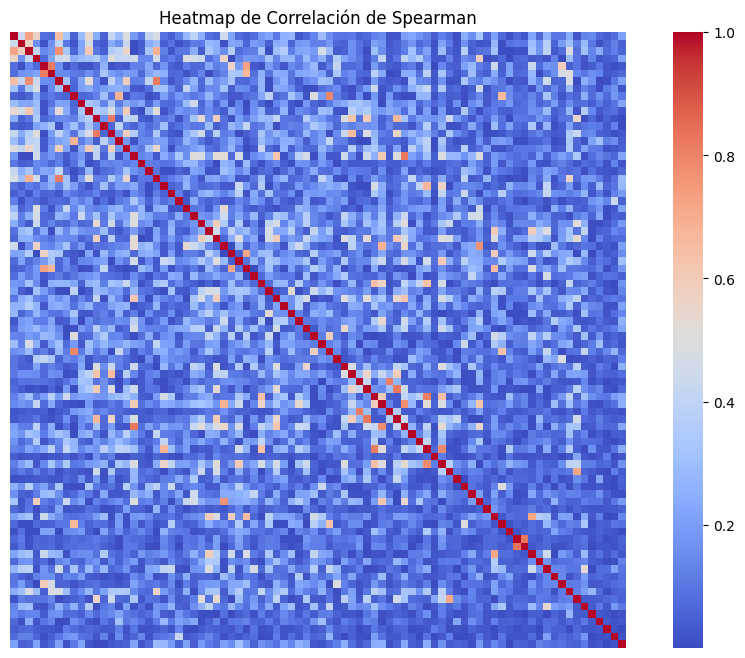

In [29]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el heatmap
sns.heatmap(correlation_spearman_abs, cmap='coolwarm', fmt='.2f', square=True, xticklabels=False, yticklabels=False)

# Configurar los títulos y etiquetas
plt.title('Heatmap de Correlación de Spearman')
plt.show()


In [30]:
df_corr.to_csv("Alta_correlacion/SRC_corr.csv", index=False)

# Determinación de normalidad
<hr>

In [31]:
dic_norm = {}

In [32]:
from scipy.stats import anderson

for i in df_corr.columns:
    result = anderson(df_corr[i], dist="norm")
    if result.statistic > result.critical_values[2]:
        resultado = 0 # No es normal
    else:
        resultado = 1 # Es normal
    dic_norm[i] = resultado

# Pruebas de hipótesis
<hr>

In [33]:
df_h = pd.concat((df_corr, df["Inhibidor"]), axis=1)

In [34]:
df_h

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,...,fr_phenol_noOrthoHbond,fr_phos_ester,fr_piperzine,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_thiazole,fr_thiophene,fr_urea,Inhibidor
0,0.516546,0.392974,0.917956,0.759277,0.355505,0.644495,0.190138,0.730750,0.184118,0.705178,...,0.000000,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0
1,0.797206,0.047111,0.637793,0.026762,0.388312,0.611688,0.705957,0.499342,0.014832,0.606837,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
2,0.812730,0.019116,0.208780,0.201680,0.356595,0.733345,0.963651,0.699329,0.145809,0.492097,...,0.000000,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
3,0.533749,0.161872,0.839263,0.696063,0.323419,0.676581,0.244212,0.742350,0.012821,0.866536,...,0.285714,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
4,0.537687,0.401406,0.919096,0.380654,0.349081,0.650919,0.191142,0.802261,0.580577,0.703758,...,0.000000,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,0.674413,0.537577,0.397138,0.412735,0.705442,0.294558,0.346945,0.758921,0.154990,0.697437,...,0.000000,0.000000,1.0,0.000000,0.0,0.5,0.0,0.5,0.0,1
2920,0.684547,0.037461,0.324157,0.415340,0.665894,0.334106,0.486962,0.842733,0.155050,0.615602,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
2921,0.778701,0.101009,0.230822,0.407380,0.665949,0.427240,0.706991,0.797260,0.040574,0.678194,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
2922,0.777609,0.067680,0.855696,0.657703,0.832105,0.167895,0.417306,0.704345,0.011362,0.563242,...,0.000000,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,1


In [35]:
grupo_inhibidor = df_corr[df_h["Inhibidor"] == 1]

In [36]:
grupo_inhibidor

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,...,fr_para_hydroxylation,fr_phenol_noOrthoHbond,fr_phos_ester,fr_piperzine,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_thiazole,fr_thiophene,fr_urea
2,0.812730,0.019116,0.208780,0.201680,0.356595,0.733345,0.963651,0.699329,0.145809,0.492097,...,0.0,0.000000,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.533749,0.161872,0.839263,0.696063,0.323419,0.676581,0.244212,0.742350,0.012821,0.866536,...,0.2,0.285714,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.537687,0.401406,0.919096,0.380654,0.349081,0.650919,0.191142,0.802261,0.580577,0.703758,...,0.0,0.000000,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0
5,0.752377,0.178882,0.827609,0.513835,0.631770,0.368230,0.435255,0.839691,0.184108,0.804759,...,0.2,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.0,0.0
7,0.784835,0.257606,0.830026,0.334149,0.357367,0.642633,0.417514,0.748086,0.184118,0.676961,...,0.0,0.000000,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,0.778475,0.151763,0.754052,0.397129,0.388309,0.611691,0.519280,0.747758,0.184118,0.676825,...,0.0,0.000000,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0
2919,0.674413,0.537577,0.397138,0.412735,0.705442,0.294558,0.346945,0.758921,0.154990,0.697437,...,0.0,0.000000,0.000000,1.0,0.000000,0.0,0.5,0.0,0.5,0.0
2920,0.684547,0.037461,0.324157,0.415340,0.665894,0.334106,0.486962,0.842733,0.155050,0.615602,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2921,0.778701,0.101009,0.230822,0.407380,0.665949,0.427240,0.706991,0.797260,0.040574,0.678194,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [37]:
grupo_no_inhibidor = df_corr[df_h["Inhibidor"] == 0]

In [38]:
grupo_no_inhibidor

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,...,fr_para_hydroxylation,fr_phenol_noOrthoHbond,fr_phos_ester,fr_piperzine,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_thiazole,fr_thiophene,fr_urea
0,0.516546,0.392974,0.917956,0.759277,0.355505,0.644495,0.190138,0.730750,0.184118,0.705178,...,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0
1,0.797206,0.047111,0.637793,0.026762,0.388312,0.611688,0.705957,0.499342,0.014832,0.606837,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.540122,0.432524,0.923302,0.343649,0.349083,0.650917,0.135569,0.802261,0.184118,0.741029,...,0.0,0.0,0.0,1.0,0.333333,0.0,0.0,0.0,0.5,0.0
10,0.753045,0.089153,0.679013,0.402287,0.344417,0.655583,0.595432,0.563891,0.014425,0.638672,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
11,0.715097,0.032844,0.860404,0.837384,0.734602,0.265398,0.409342,0.888941,0.580577,0.585805,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,0.760565,0.244795,0.831757,0.679962,0.449251,0.550749,0.640419,0.746481,0.014879,0.760234,...,0.2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2910,0.777742,0.046776,0.235212,0.345290,0.789356,0.427385,0.604606,0.789376,0.040574,0.707535,...,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0
2916,0.777517,0.267155,0.826820,0.483151,0.715846,0.284154,0.191181,0.767047,0.184118,0.765279,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2918,0.720897,0.014830,0.855302,0.463290,0.455731,0.544269,0.384930,0.791426,0.014401,0.581722,...,0.2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [39]:
p_values = {}

In [40]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

for i in df_h.columns:
    if i == "Inhibidor":
        break
    if dic_norm == 0:
        estadistica, p_valor = ttest_ind(grupo_inhibidor[i], grupo_no_inhibidor[i])
    else:
        estadistica, p_valor = mannwhitneyu(grupo_inhibidor[i], grupo_no_inhibidor[i])

    if p_valor > 0.05:
        p_values[i] = 0 # Los grupos son iguales y por lo tanto, no es significativa
    else:
        p_values[i] = 1 # Los grupos son diferentes y por lo tanto, es significativa

In [41]:
p_values

{'MaxAbsEStateIndex': 1,
 'MinAbsEStateIndex': 1,
 'MinEStateIndex': 1,
 'qed': 0,
 'MinPartialCharge': 1,
 'MaxAbsPartialCharge': 1,
 'MinAbsPartialCharge': 1,
 'FpDensityMorgan3': 1,
 'BCUT2D_MWHI': 1,
 'BCUT2D_MWLOW': 0,
 'BCUT2D_CHGHI': 1,
 'BCUT2D_CHGLO': 1,
 'BCUT2D_LOGPHI': 0,
 'BCUT2D_LOGPLOW': 1,
 'BCUT2D_MRHI': 1,
 'BCUT2D_MRLOW': 1,
 'BalabanJ': 1,
 'PEOE_VSA11': 0,
 'PEOE_VSA13': 1,
 'PEOE_VSA14': 1,
 'PEOE_VSA3': 1,
 'PEOE_VSA4': 1,
 'PEOE_VSA5': 1,
 'PEOE_VSA6': 1,
 'PEOE_VSA7': 1,
 'PEOE_VSA8': 1,
 'PEOE_VSA9': 1,
 'SMR_VSA6': 1,
 'SMR_VSA7': 1,
 'SMR_VSA9': 1,
 'SlogP_VSA10': 1,
 'SlogP_VSA11': 1,
 'SlogP_VSA4': 1,
 'SlogP_VSA8': 1,
 'EState_VSA3': 1,
 'EState_VSA4': 1,
 'EState_VSA5': 1,
 'EState_VSA6': 1,
 'EState_VSA7': 1,
 'EState_VSA8': 1,
 'EState_VSA9': 1,
 'VSA_EState1': 1,
 'VSA_EState10': 1,
 'VSA_EState3': 0,
 'VSA_EState8': 1,
 'FractionCSP3': 0,
 'NumAliphaticCarbocycles': 1,
 'NumAliphaticRings': 1,
 'NumAromaticHeterocycles': 1,
 'NumAromaticRings': 1,
 '

In [42]:
p_df = pd.Series(p_values)

In [43]:
p_df.value_counts()

1    70
0    12
Name: count, dtype: int64

In [44]:
p_names = p_df[p_df == 1].index

In [45]:
p_names

Index(['MaxAbsEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex',
       'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge',
       'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO',
       'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ',
       'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5',
       'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA6',
       'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA4',
       'SlogP_VSA8', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5',
       'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9',
       'VSA_EState1', 'VSA_EState10', 'VSA_EState8', 'NumAliphaticCarbocycles',
       'NumAliphaticRings', 'NumAromaticHeterocycles', 'NumAromaticRings',
       'NumSaturatedCarbocycles', 'NumSaturatedRings', 'RingCount',
       'fr_Al_COO', 'fr_ArN', 'fr_Ar_N', 'fr_NH0', 'fr_Ndealkylation1',
       'fr_Ndealkylation2', 'fr_aryl_methyl', 'fr_benzene', 'fr_ester'

In [46]:
df_p_final = df_h[p_names]

In [47]:
df_p_final

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_CHGHI,BCUT2D_CHGLO,...,fr_methoxy,fr_morpholine,fr_nitrile,fr_para_hydroxylation,fr_phos_ester,fr_piperzine,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_urea
0,0.516546,0.392974,0.917956,0.355505,0.644495,0.190138,0.730750,0.184118,0.286989,0.721616,...,0.4,0.0,0.5,0.0,0.000000,0.0,0.333333,0.0,0.0,0.0
1,0.797206,0.047111,0.637793,0.388312,0.611688,0.705957,0.499342,0.014832,0.573863,0.531383,...,0.2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.812730,0.019116,0.208780,0.356595,0.733345,0.963651,0.699329,0.145809,0.493583,0.555728,...,0.0,0.0,0.0,0.0,0.333333,0.0,0.000000,0.0,0.0,0.0
3,0.533749,0.161872,0.839263,0.323419,0.676581,0.244212,0.742350,0.012821,0.224962,0.889470,...,0.0,0.0,0.0,0.2,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.537687,0.401406,0.919096,0.349081,0.650919,0.191142,0.802261,0.580577,0.320971,0.549522,...,0.4,0.5,0.5,0.0,0.000000,0.0,0.333333,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,0.674413,0.537577,0.397138,0.705442,0.294558,0.346945,0.758921,0.154990,0.306541,0.408980,...,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,0.5,0.0
2920,0.684547,0.037461,0.324157,0.665894,0.334106,0.486962,0.842733,0.155050,0.759395,0.629989,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2921,0.778701,0.101009,0.230822,0.665949,0.427240,0.706991,0.797260,0.040574,0.532360,0.508724,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2922,0.777609,0.067680,0.855696,0.832105,0.167895,0.417306,0.704345,0.011362,0.279522,0.748676,...,0.0,0.0,0.0,0.2,0.000000,0.0,0.333333,0.0,0.0,0.0


In [48]:
df_p_final.to_csv("Prueba_hipotesis/SRC_h.csv", index=False)